<a href="https://colab.research.google.com/github/Satvik256/Spoon-Knife/blob/master/Animating_minimize_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In [0]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [0]:
xmin, xmax, xstep = -4.5, 4.5, .1
ymin, ymax, ystep = -4.5, 4.5, .1

In [0]:
x,y=np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [0]:
z=f(x,y)

In [0]:
minima = np.array([3., .5])

In [39]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

In [43]:
f(*minima)

0.0

# **3D SURFACE PLOT**

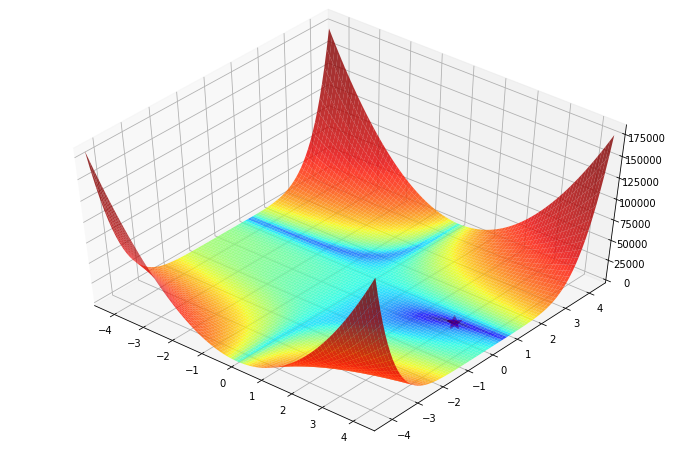

In [66]:
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection='3d',elev=50,azim=-50)
ax.plot_surface(x,y,z,norm=LogNorm(),rstride=1,cstride=1,edgecolor='none',alpha=.8,cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), '*r', markersize=15)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

In [0]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

In [64]:
dz_dx

array([[-80403.984375 , -78626.41875  , -76848.853125 , ...,
         76021.790625 ,  77799.35625  ,  79576.921875 ],
       [-70531.429104 , -68972.6428128, -67413.8565216, ...,
         66641.7645216,  68200.5508128,  69759.337104 ],
       [-61698.161091 , -60335.0876612, -58972.0142314, ...,
         58252.3007314,  59615.3741612,  60978.447591 ],
       ...,
       [-57820.485591 , -56524.4577612, -55228.4299314, ...,
         56229.9634314,  57525.9912612,  58822.019091 ],
       [-66385.573104 , -64898.4540128, -63411.3349216, ...,
         64480.9069216,  65968.0260128,  67455.145104 ],
       [-75977.671875 , -74276.60625  , -72575.540625 , ...,
         73716.103125 ,  75417.16875  ,  77118.234375 ]])

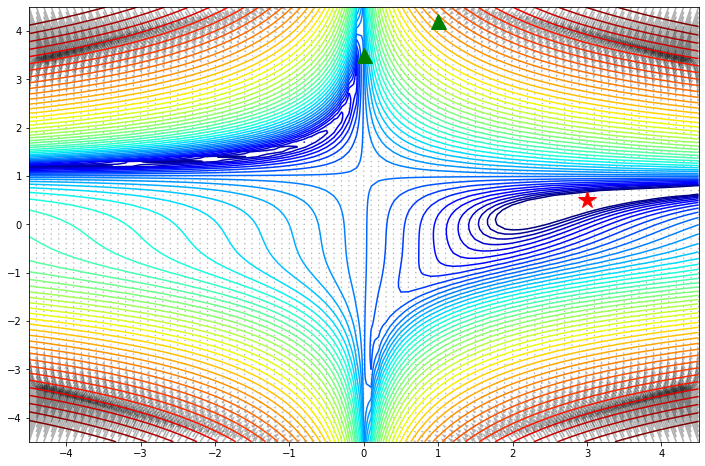

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.contour(x, y, z, levels=np.logspace(0, 5, 45), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy,alpha=0.3)
ax.plot(*minima_, 'r*', markersize=18)
ax.plot(np.array([3.5,4.2]),'^g',markersize=15)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

In [0]:
x0 = np.array([3., 4.])

In [0]:
func = value_and_grad(lambda args: f(*args))

In [89]:
res=minimize(func,method='Newton-CG',jac=True,tol=1e-20,callback=print,x0=x0)

[2.71113991 3.35161828]
[2.48008912 2.78955116]
[2.29965866 2.30123678]
[2.16373347 1.8756312 ]
[2.06741079 1.50235414]
[2.00766238 1.17079384]
[1.98485905 0.86972447]
[2.00511126 0.59071489]
[2.07692544 0.34891823]
[2.17857778 0.21644485]
[2.55966682 0.38003383]
[2.80228089 0.44954972]
[2.94477854 0.48765376]
[2.94564749 0.48601427]
[2.95359059 0.48810805]
[2.97113927 0.49269804]
[2.99870879 0.49976069]
[2.99999481 0.49999876]
[3.00000001 0.49999999]
[3.  0.5]
[3.  0.5]


In [90]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'message': 'Optimization terminated successfully.',
 'nfev': 22,
 'nhev': 0,
 'nit': 21,
 'njev': 104,
 'status': 0,
 'success': True,
 'x': array([3. , 0.5])}

In [0]:
def make_minimize_cb(path=[]):
    def minimize_cb(xk):
        path.append(np.copy(xk))
    return minimize_cb

In [0]:
path_=[x0]

In [0]:
res=minimize(func,method='Newton-CG',jac=True,x0=x0,callback=make_minimize_cb(path_))

In [95]:
res

     fun: 1.6289574062318505e-15
     jac: array([-2.1656759e-06,  2.0280272e-06])
 message: 'Optimization terminated successfully.'
    nfev: 20
    nhev: 0
     nit: 19
    njev: 94
  status: 0
 success: True
       x: array([3.00000001, 0.49999999])

In [96]:
path_

[array([3., 4.]),
 array([2.71113991, 3.35161828]),
 array([2.48008912, 2.78955116]),
 array([2.29965866, 2.30123678]),
 array([2.16373347, 1.8756312 ]),
 array([2.06741079, 1.50235414]),
 array([2.00766238, 1.17079384]),
 array([1.98485905, 0.86972447]),
 array([2.00511126, 0.59071489]),
 array([2.07692544, 0.34891823]),
 array([2.17857778, 0.21644485]),
 array([2.55966682, 0.38003383]),
 array([2.80228089, 0.44954972]),
 array([2.94477854, 0.48765376]),
 array([2.94564749, 0.48601427]),
 array([2.95359059, 0.48810805]),
 array([2.97113927, 0.49269804]),
 array([2.99870879, 0.49976069]),
 array([2.99999481, 0.49999876]),
 array([3.00000001, 0.49999999])]

In [0]:
path=np.array(path_).T

In [101]:
path,path.shape

(array([[3.        , 2.71113991, 2.48008912, 2.29965866, 2.16373347,
         2.06741079, 2.00766238, 1.98485905, 2.00511126, 2.07692544,
         2.17857778, 2.55966682, 2.80228089, 2.94477854, 2.94564749,
         2.95359059, 2.97113927, 2.99870879, 2.99999481, 3.00000001],
        [4.        , 3.35161828, 2.78955116, 2.30123678, 1.8756312 ,
         1.50235414, 1.17079384, 0.86972447, 0.59071489, 0.34891823,
         0.21644485, 0.38003383, 0.44954972, 0.48765376, 0.48601427,
         0.48810805, 0.49269804, 0.49976069, 0.49999876, 0.49999999]]),
 (2, 20))

(-4.5, 4.5)

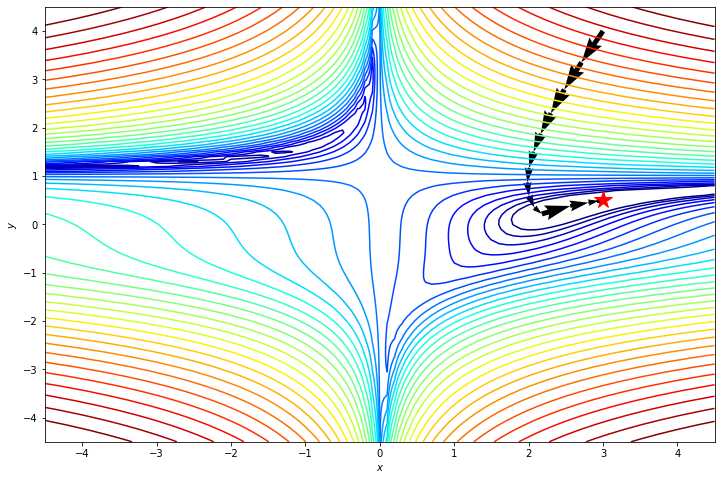

In [103]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.contour(x, y, z, levels=np.logspace(0, 5, 30), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

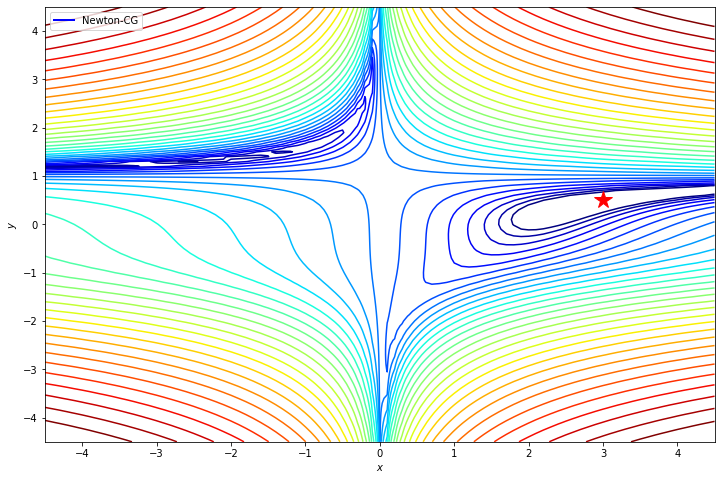

In [107]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.contour(x, y, z, levels=np.logspace(0, 5, 30), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [0]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

In [0]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [0]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=120, 
                               repeat_delay=5, blit=True)

In [113]:
HTML(anim.to_html5_video())